In [55]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import pandas as pd
import numpy as np
import matplotlib
import threading
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
matplotlib.rcParams['savefig.dpi'] = 200
sys.setrecursionlimit(3000)
import pickle
from sklearn import preprocessing
import time
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('white')

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
workingDirectory = '/home/h1bennet/lxr/results/181030_dmhca_ip_nash/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)


### Define functions for later...

### QC

In [57]:
rna_qc = ngs_qc('/home/h1bennet/lxr/data/mouse/RNA/dmhca_ip_nash/', 'rna')

/home/h1bennet/lxr/data/mouse/RNA/dmhca_ip_nash//
./dmhca_ip_nash_qc/


/home/h1bennet/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [58]:
rna_qc

,uniquePositions,fragmentLengthEstimate,tagsPerBP,clonality,GC_Content,totalReads,uniquelyMappedReads,multiMappedReads,frac_unmappedReads_mismatch,frac_unmappedReads_short,frac_unmappedReads_other,uniquelyMappedFraction,mappedFraction
C57B6J_Tim4NegKupffer_RNA_DMHCA50mgperkg_12h_AMLNDiet_20week_C572A_HBENN_l20181012_GAGTGG,3756244.0,75.0,0.002810,2.035,0.497,8716677.0,7644754.0,701655.0,0.0,0.0347,0.0033,0.877026,-8.716676e+06
C57B6J_Tim4NegKupffer_RNA_DMHCA50mgperkg_12h_AMLNDiet_20week_C572C_HBENN_l20181012_ACTGAT,4519772.0,75.0,0.003425,2.063,0.489,10588402.0,9322608.0,871548.0,0.0,0.0294,0.0029,0.880455,-1.058840e+07
C57B6J_Tim4NegKupffer_RNA_Veh_12h_AMLNDiet_20week_C572B_HBENN_l20181012_GGTAGC,4569730.0,75.0,0.003502,2.085,0.494,10908904.0,9529998.0,921202.0,0.0,0.0331,0.0024,0.873598,-1.090890e+07
C57B6J_Tim4NegKupffer_RNA_Veh_12h_AMLNDiet_20week_C572D_HBENN_l20181012_ATGAGC,3310890.0,75.0,0.002777,2.282,0.495,8591787.0,7556937.0,707781.0,0.0,0.0286,0.0039,0.879554,-8.591786e+06
C57B6J_Tim4PosKupffer_RNA_DMHCA50mgperkg_12h_AMLNDiet_20week_C572A_HBENN_l20181012_GTGGCC,3488366.0,75.0,0.002735,2.134,0.489,11859617.0,7442615.0,682314.0,0.0,0.3094,0.0023,0.627559,-1.185962e+07
C57B6J_Tim4PosKupffer_RNA_DMHCA50mgperkg_12h_ControlDiet_20week_C571C_HBENN_l20181012_GTCCGC,2222694.0,75.0,0.002831,3.466,0.503,8685113.0,7702997.0,659055.0,0.0,0.0285,0.0027,0.886920,-8.685112e+06
C57B6J_Tim4PosKupffer_RNA_Veh_12h_AMLNDiet_20week_C572B_HBENN_l20181012_GTTTCG,4372579.0,75.0,0.003306,2.057,0.489,10442431.0,8995677.0,897219.0,0.0,0.0393,0.0032,0.861454,-1.044243e+07
C57B6J_Tim4PosKupffer_RNA_Veh_12h_ControlDiet_20week_C571D_HBENN_l20181012_GTGAAA,1793041.0,75.0,0.002974,4.512,0.506,9289142.0,8090162.0,731889.0,0.0,0.0418,0.0023,0.870927,-9.289141e+06


### Aggregate counts

In [59]:
%%bash
# if directories don't exist, create them
if [ ! -d ./expression/ ]; then mkdir ./expression; fi

analyzeRepeats.pl rna mm10 -count exons -condenseGenes -raw -d /home/h1bennet/lxr/data/mouse/RNA/dmhca_ip_nash/* > ./expression/rna_exp_raw.tsv
analyzeRepeats.pl rna mm10 -count exons -condenseGenes -rpkm -d /home/h1bennet/lxr/data/mouse/RNA/dmhca_ip_nash/* > ./expression/rna_exp_rpkm.tsv
# analyzeRepeats.pl rna mm10 -count exons -condenseGenes -tpm -d /home/h1bennet/lxr/data/mouse/RNA/dmhca_ip_nash/* > ./expression/rna_exp_tpm.tsv

	Tag Directories:
		/home/h1bennet/lxr/data/mouse/RNA/dmhca_ip_nash/C57B6J_Tim4NegKupffer_RNA_DMHCA50mgperkg_12h_AMLNDiet_20week_C572A_HBENN_l20181012_GAGTGG
		/home/h1bennet/lxr/data/mouse/RNA/dmhca_ip_nash/C57B6J_Tim4NegKupffer_RNA_DMHCA50mgperkg_12h_AMLNDiet_20week_C572C_HBENN_l20181012_ACTGAT
		/home/h1bennet/lxr/data/mouse/RNA/dmhca_ip_nash/C57B6J_Tim4NegKupffer_RNA_Veh_12h_AMLNDiet_20week_C572B_HBENN_l20181012_GGTAGC
		/home/h1bennet/lxr/data/mouse/RNA/dmhca_ip_nash/C57B6J_Tim4NegKupffer_RNA_Veh_12h_AMLNDiet_20week_C572D_HBENN_l20181012_ATGAGC
		/home/h1bennet/lxr/data/mouse/RNA/dmhca_ip_nash/C57B6J_Tim4PosKupffer_RNA_DMHCA50mgperkg_12h_AMLNDiet_20week_C572A_HBENN_l20181012_GTGGCC
		/home/h1bennet/lxr/data/mouse/RNA/dmhca_ip_nash/C57B6J_Tim4PosKupffer_RNA_DMHCA50mgperkg_12h_ControlDiet_20week_C571C_HBENN_l20181012_GTCCGC
		/home/h1bennet/lxr/data/mouse/RNA/dmhca_ip_nash/C57B6J_Tim4PosKupffer_RNA_Veh_12h_AMLNDiet_20week_C572B_HBENN_l20181012_GTTTCG
		/home/h1bennet/lxr/data/mouse/

### Summary plots (PCA, heatmap)

In [66]:
# read in rpkm
rpkm = pd.read_csv('./expression/rna_exp_rpkm.tsv', sep='\t')
rpkm.set_index(rpkm.columns.values[0], inplace=True)
rpkm.index.rename('refseqID', inplace=True)
# set rpkm index
mm10_gene = rpkm['Annotation/Divergence'].str.split('|').str[0]

# clean up column names
# rename rpkm columns
rpkm = rpkm.rename(columns=dict(zip(rpkm.iloc[:, 7:].columns.values,
                                    pd.Series(rpkm.iloc[:, 7:].columns.values).str[:-5].str.split('/').str[-1])))
# change index to gene names
rpkm['gene'] = mm10_gene
rpkm = rpkm.reset_index().set_index('gene').drop(labels='refseqID', axis=1)

# filter genes with length < 250 bp
rpkm = rpkm.loc[rpkm.Length >= 250, :]

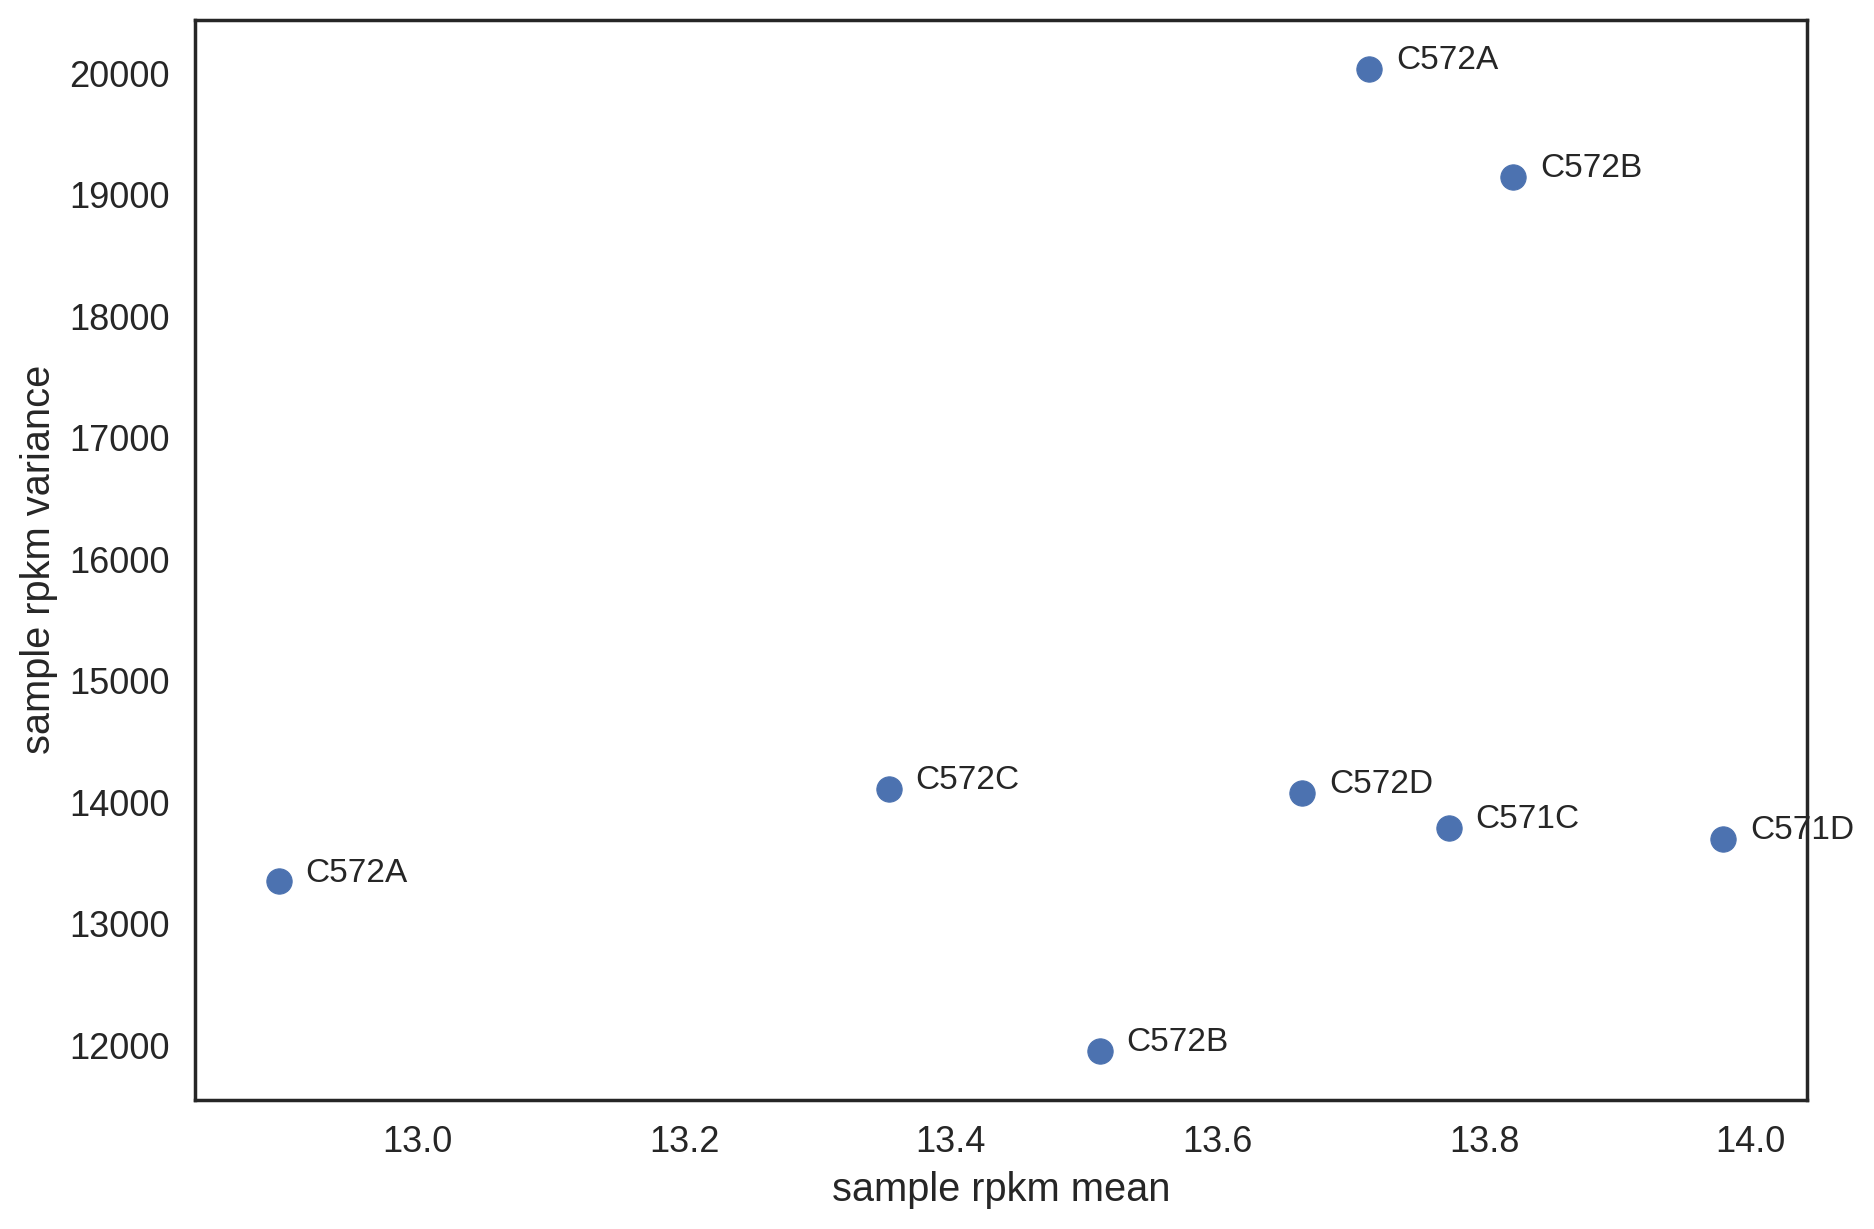

In [67]:
ax = plt.scatter(rpkm.iloc[:, 7:].mean(), rpkm.iloc[:, 7:].var())
plt.xlabel('sample rpkm mean')
plt.ylabel('sample rpkm variance')
label_point(rpkm.iloc[:, 7:].mean(),
            rpkm.iloc[:, 7:].var(),
            pd.Series(rpkm.iloc[:, 7:].columns.values, index=rpkm.iloc[:, 7:].columns.values).str.split('_').str[-4],
            plt.gca())

### PCA plot

In [68]:
if not os.path.isdir('./figures'):
    os.mkdir('./figures')

In [69]:
# filter lowly expressed genes
rpkm_filt = rpkm.loc[(rpkm.iloc[:, 7:] > 4).all(1), :]


samples = pd.Series(rpkm.iloc[:, 7:].columns.values)
diet = samples.str.split('_').str[5]
group = samples.str.split('_').str[3]
cell = samples.str.split('_').str[1]
cage = samples.str.split('_').str[7]


samplesDF = pd.DataFrame([pd.Series(samples),
                          pd.Series(cage),
                          pd.Series(group),
                          pd.Series(cell),
                          pd.Series(diet)],
                          index=['mouse', 'cage', 'group', 'cell', 'diet']).T

# quantile normalize
rpkm_filt_quant = quantile_normalize_df(rpkm_filt.iloc[:, 7:])

In [70]:
samplesDF

,mouse,cage,group,cell,diet
0,C57B6J_Tim4NegKupffer_RNA_DMHCA50mgperkg_12h_A...,C572A,DMHCA50mgperkg,Tim4NegKupffer,AMLNDiet
1,C57B6J_Tim4NegKupffer_RNA_DMHCA50mgperkg_12h_A...,C572C,DMHCA50mgperkg,Tim4NegKupffer,AMLNDiet
2,C57B6J_Tim4NegKupffer_RNA_Veh_12h_AMLNDiet_20w...,C572B,Veh,Tim4NegKupffer,AMLNDiet
3,C57B6J_Tim4NegKupffer_RNA_Veh_12h_AMLNDiet_20w...,C572D,Veh,Tim4NegKupffer,AMLNDiet
4,C57B6J_Tim4PosKupffer_RNA_DMHCA50mgperkg_12h_A...,C572A,DMHCA50mgperkg,Tim4PosKupffer,AMLNDiet
5,C57B6J_Tim4PosKupffer_RNA_DMHCA50mgperkg_12h_C...,C571C,DMHCA50mgperkg,Tim4PosKupffer,ControlDiet
6,C57B6J_Tim4PosKupffer_RNA_Veh_12h_AMLNDiet_20w...,C572B,Veh,Tim4PosKupffer,AMLNDiet
7,C57B6J_Tim4PosKupffer_RNA_Veh_12h_ControlDiet_...,C571D,Veh,Tim4PosKupffer,ControlDiet


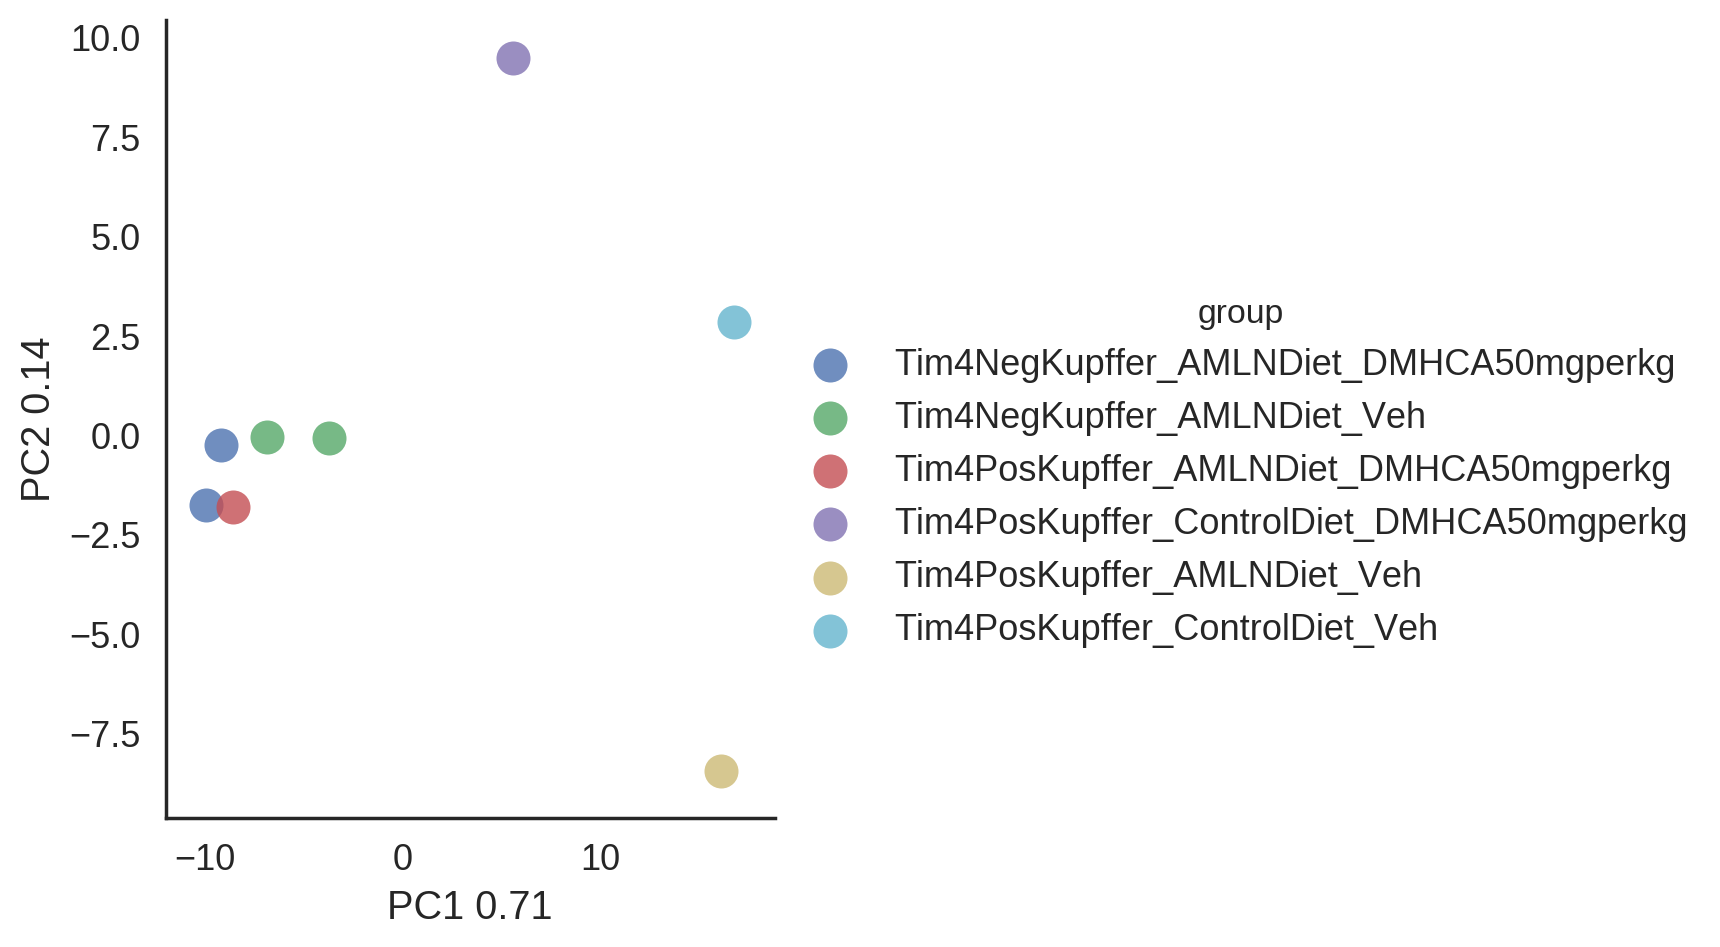

In [71]:
pca, exp_var, pcs = pca_rpkm_mat(rpkm=rpkm_filt_quant,
                                 group_labels=samplesDF.cell+'_'+samplesDF.diet+'_'+samplesDF.group,
                                 plot_size=5)
# label_point(pca.PC1,
#             pca.PC2,
#             samplesDF.cage,
#             plt.gca())
plt.savefig('./figures/rna_pca_filt.pdf')

### Label by Tim4 Status

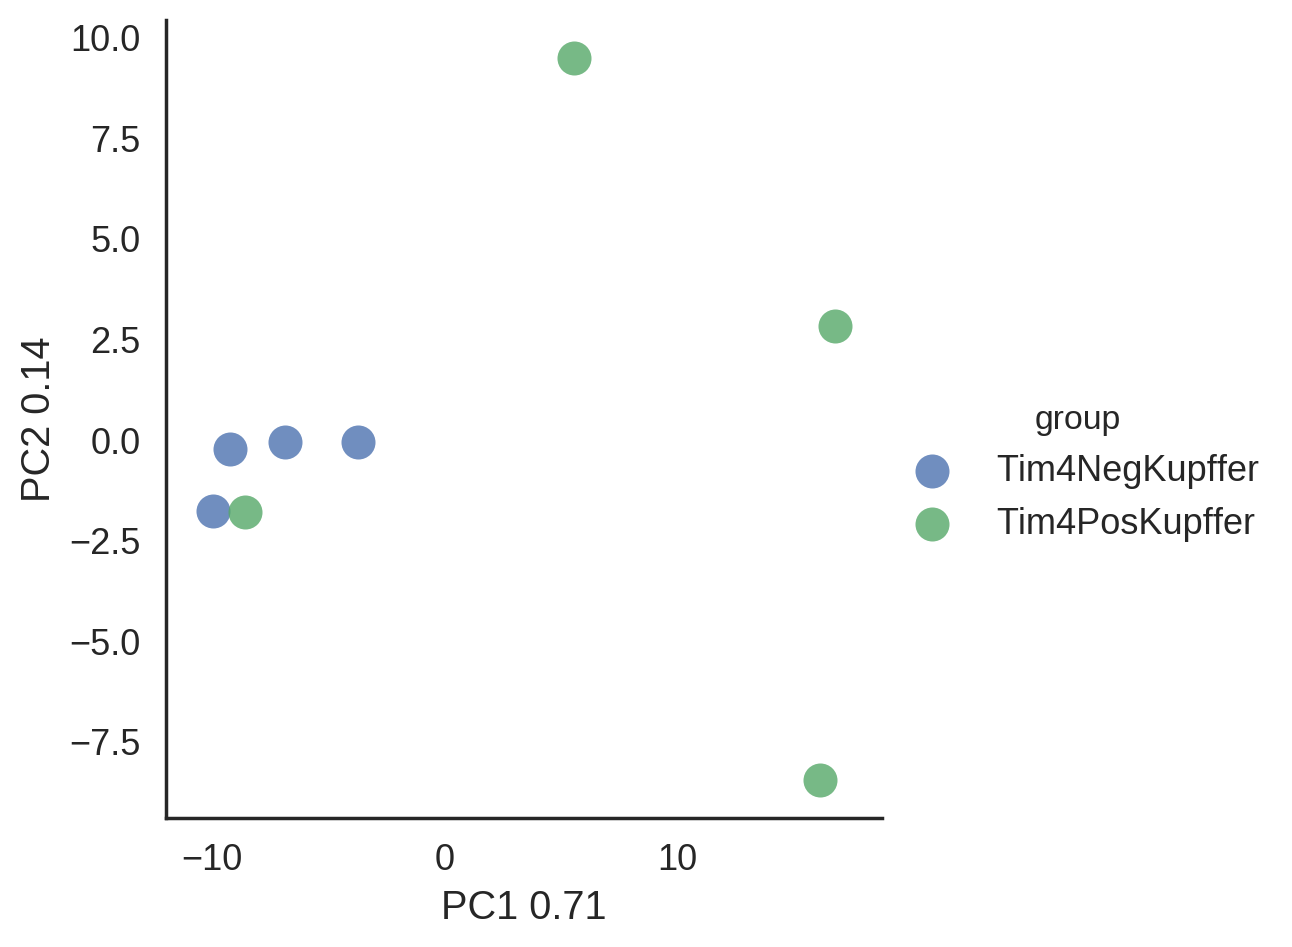

In [75]:
pca, exp_var, pcs = pca_rpkm_mat(rpkm=rpkm_filt_quant,
                                 group_labels=samplesDF.cell,
                                 plot_size=5)
# label_point(pca.PC1,
#             pca.PC2,
#             samplesDF.cage,
#             plt.gca())
plt.savefig('./figures/rna_pca_filt.pdf')

### Label by injection

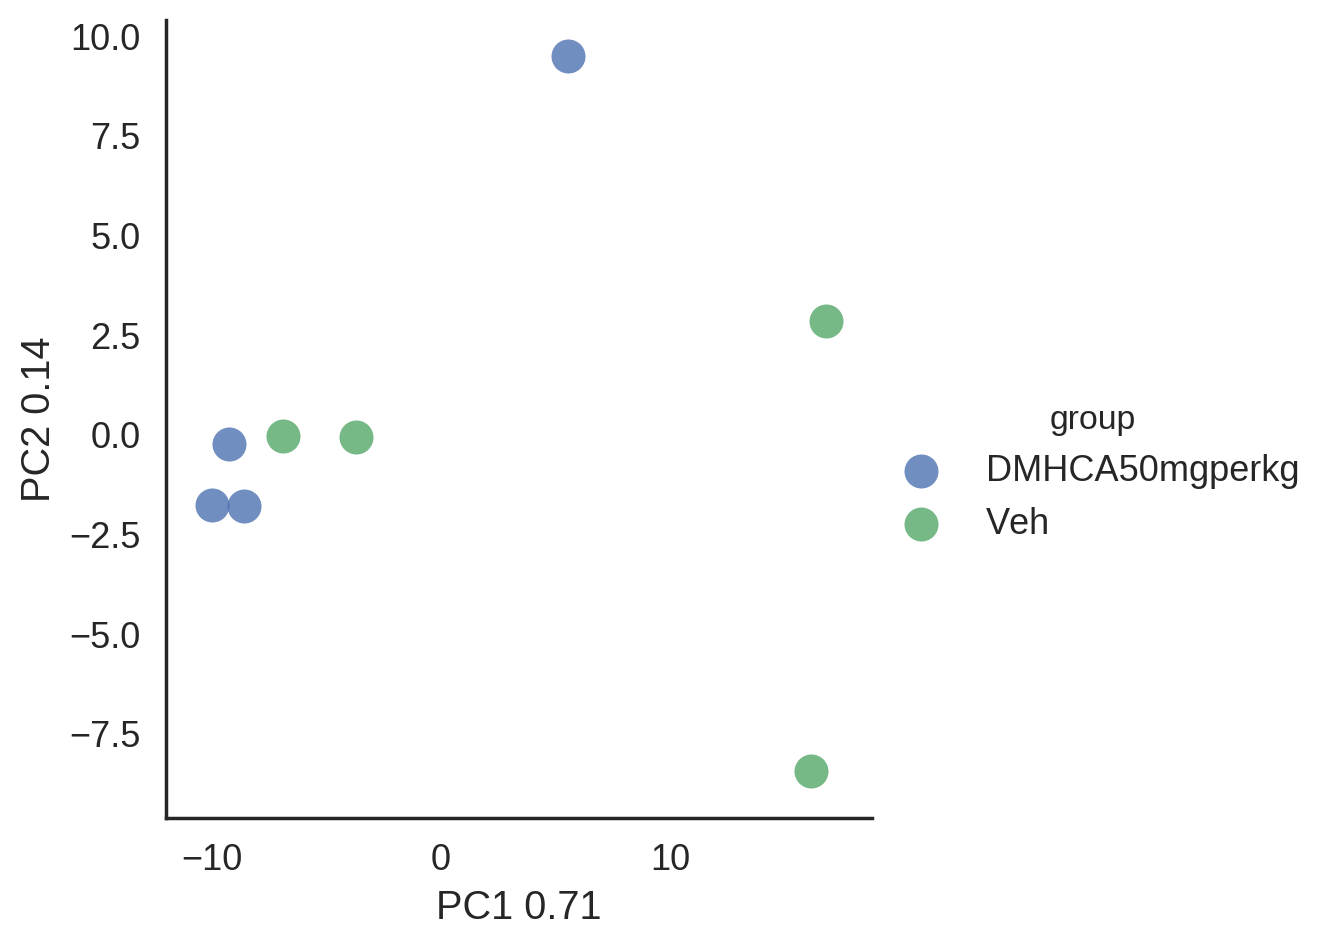

In [73]:
pca, exp_var, pcs = pca_rpkm_mat(rpkm=rpkm_filt_quant,
                                 group_labels=samplesDF.group,
                                 plot_size=5)
# label_point(pca.PC1,
#             pca.PC2,
#             samplesDF.cage,
#             plt.gca())
plt.savefig('./figures/rna_pca_filt.pdf')

### Label by diet

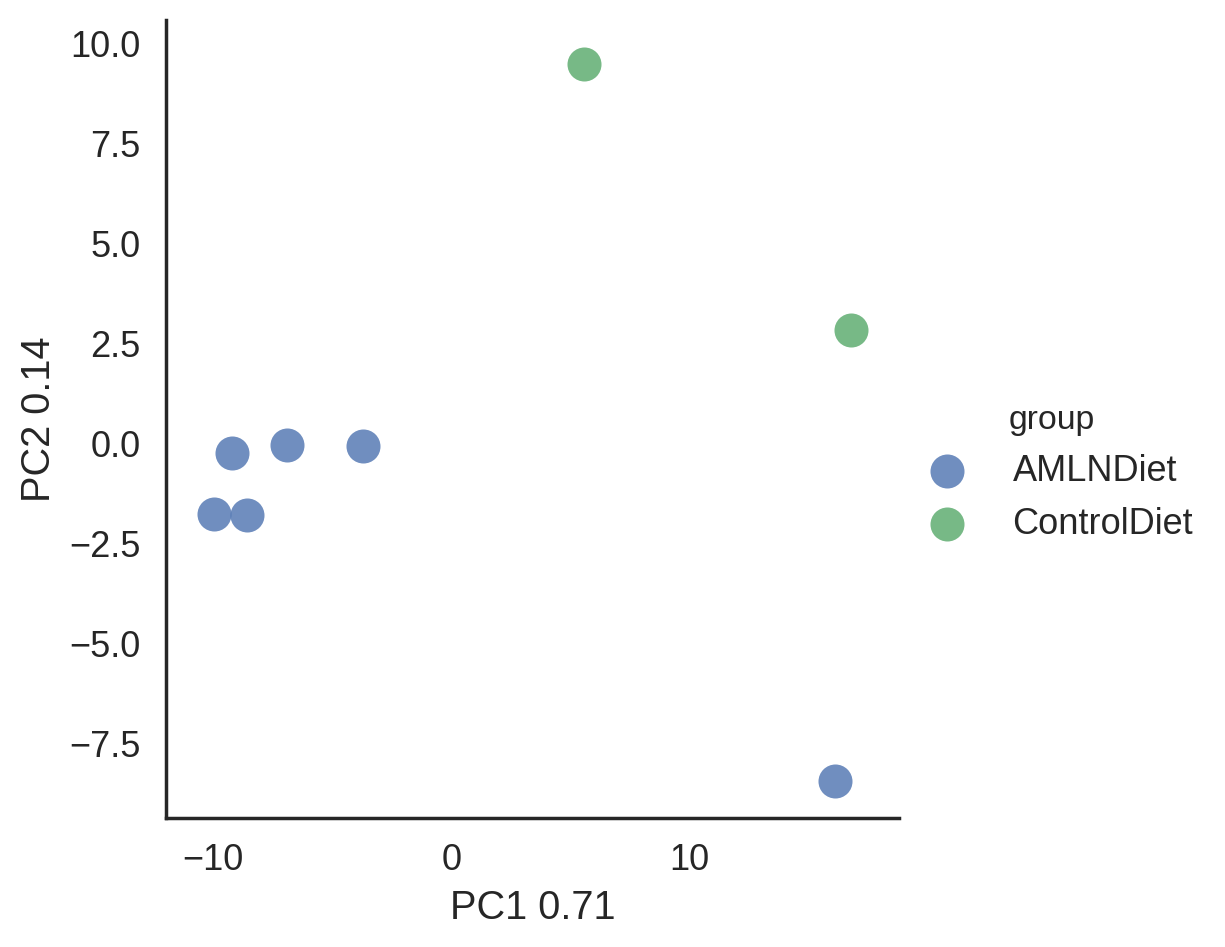

In [74]:
pca, exp_var, pcs = pca_rpkm_mat(rpkm=rpkm_filt_quant,
                                 group_labels=samplesDF.diet,
                                 plot_size=5)
# label_point(pca.PC1,
#             pca.PC2,
#             samplesDF.cage,
#             plt.gca())
plt.savefig('./figures/rna_pca_filt.pdf')

### Tim4 Only

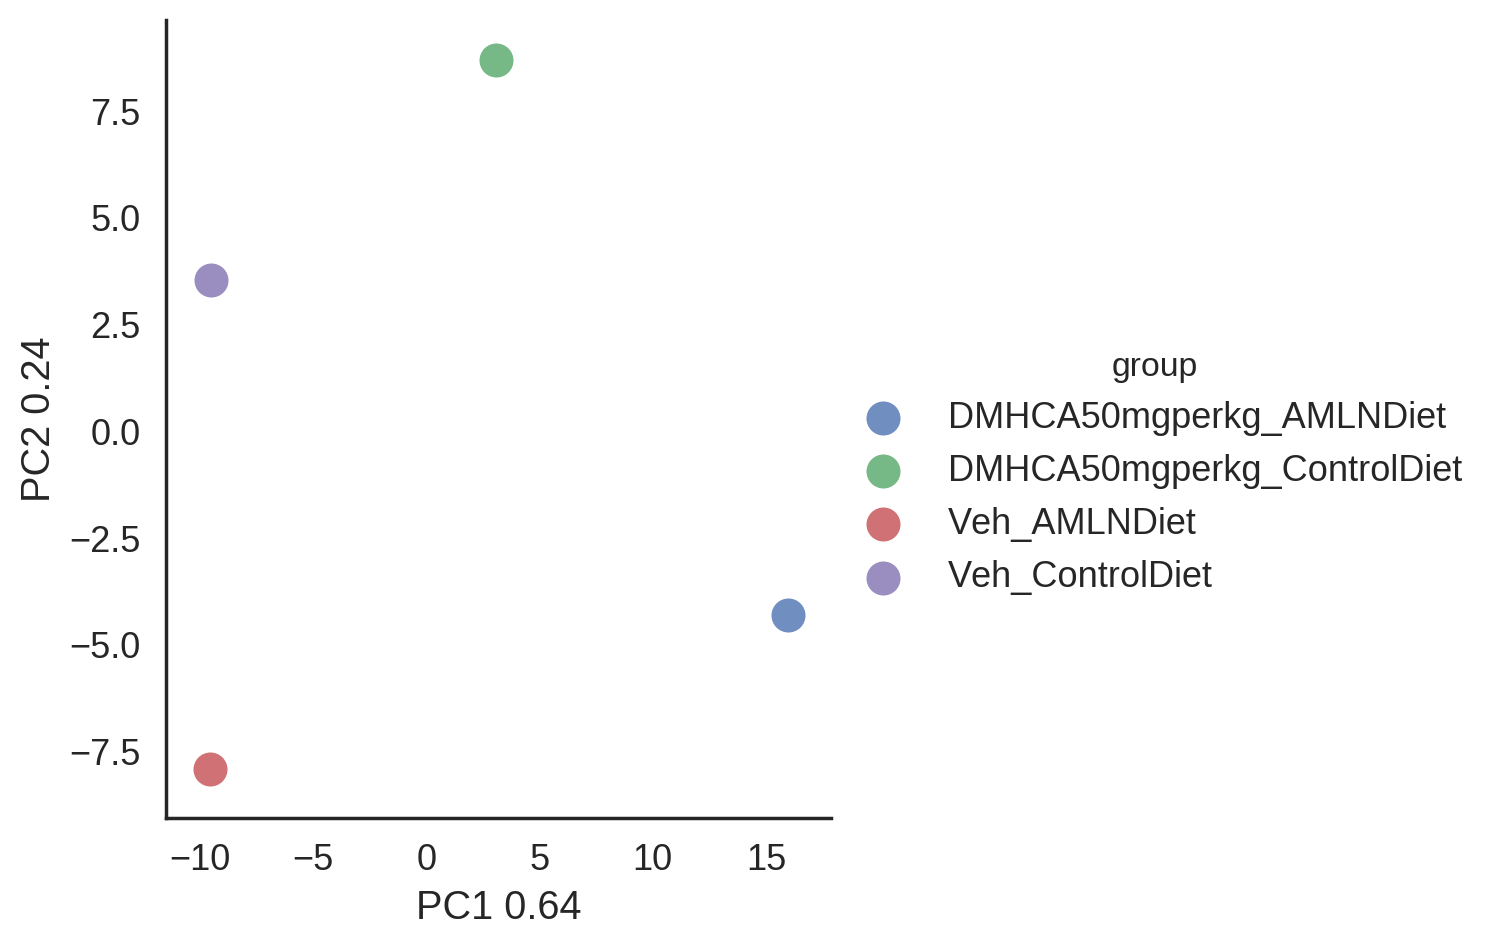

In [77]:
pca, exp_var, pcs = pca_rpkm_mat(rpkm=rpkm_filt_quant.iloc[:, 4:],
                                 group_labels=(samplesDF.group+'_'+samplesDF.diet)[4:],
                                 plot_size=5)
# label_point(pca.PC1,
#             pca.PC2,
#             samplesDF.cage,
#             plt.gca())
plt.savefig('./figures/rna_pca_filt.pdf')

### Look at pearson corr between samples

In [78]:
rpkm_tmp = rpkm_filt.iloc[:, 7:]
rpkm_tmp.columns = samplesDF.cell+'_'+samplesDF.cage

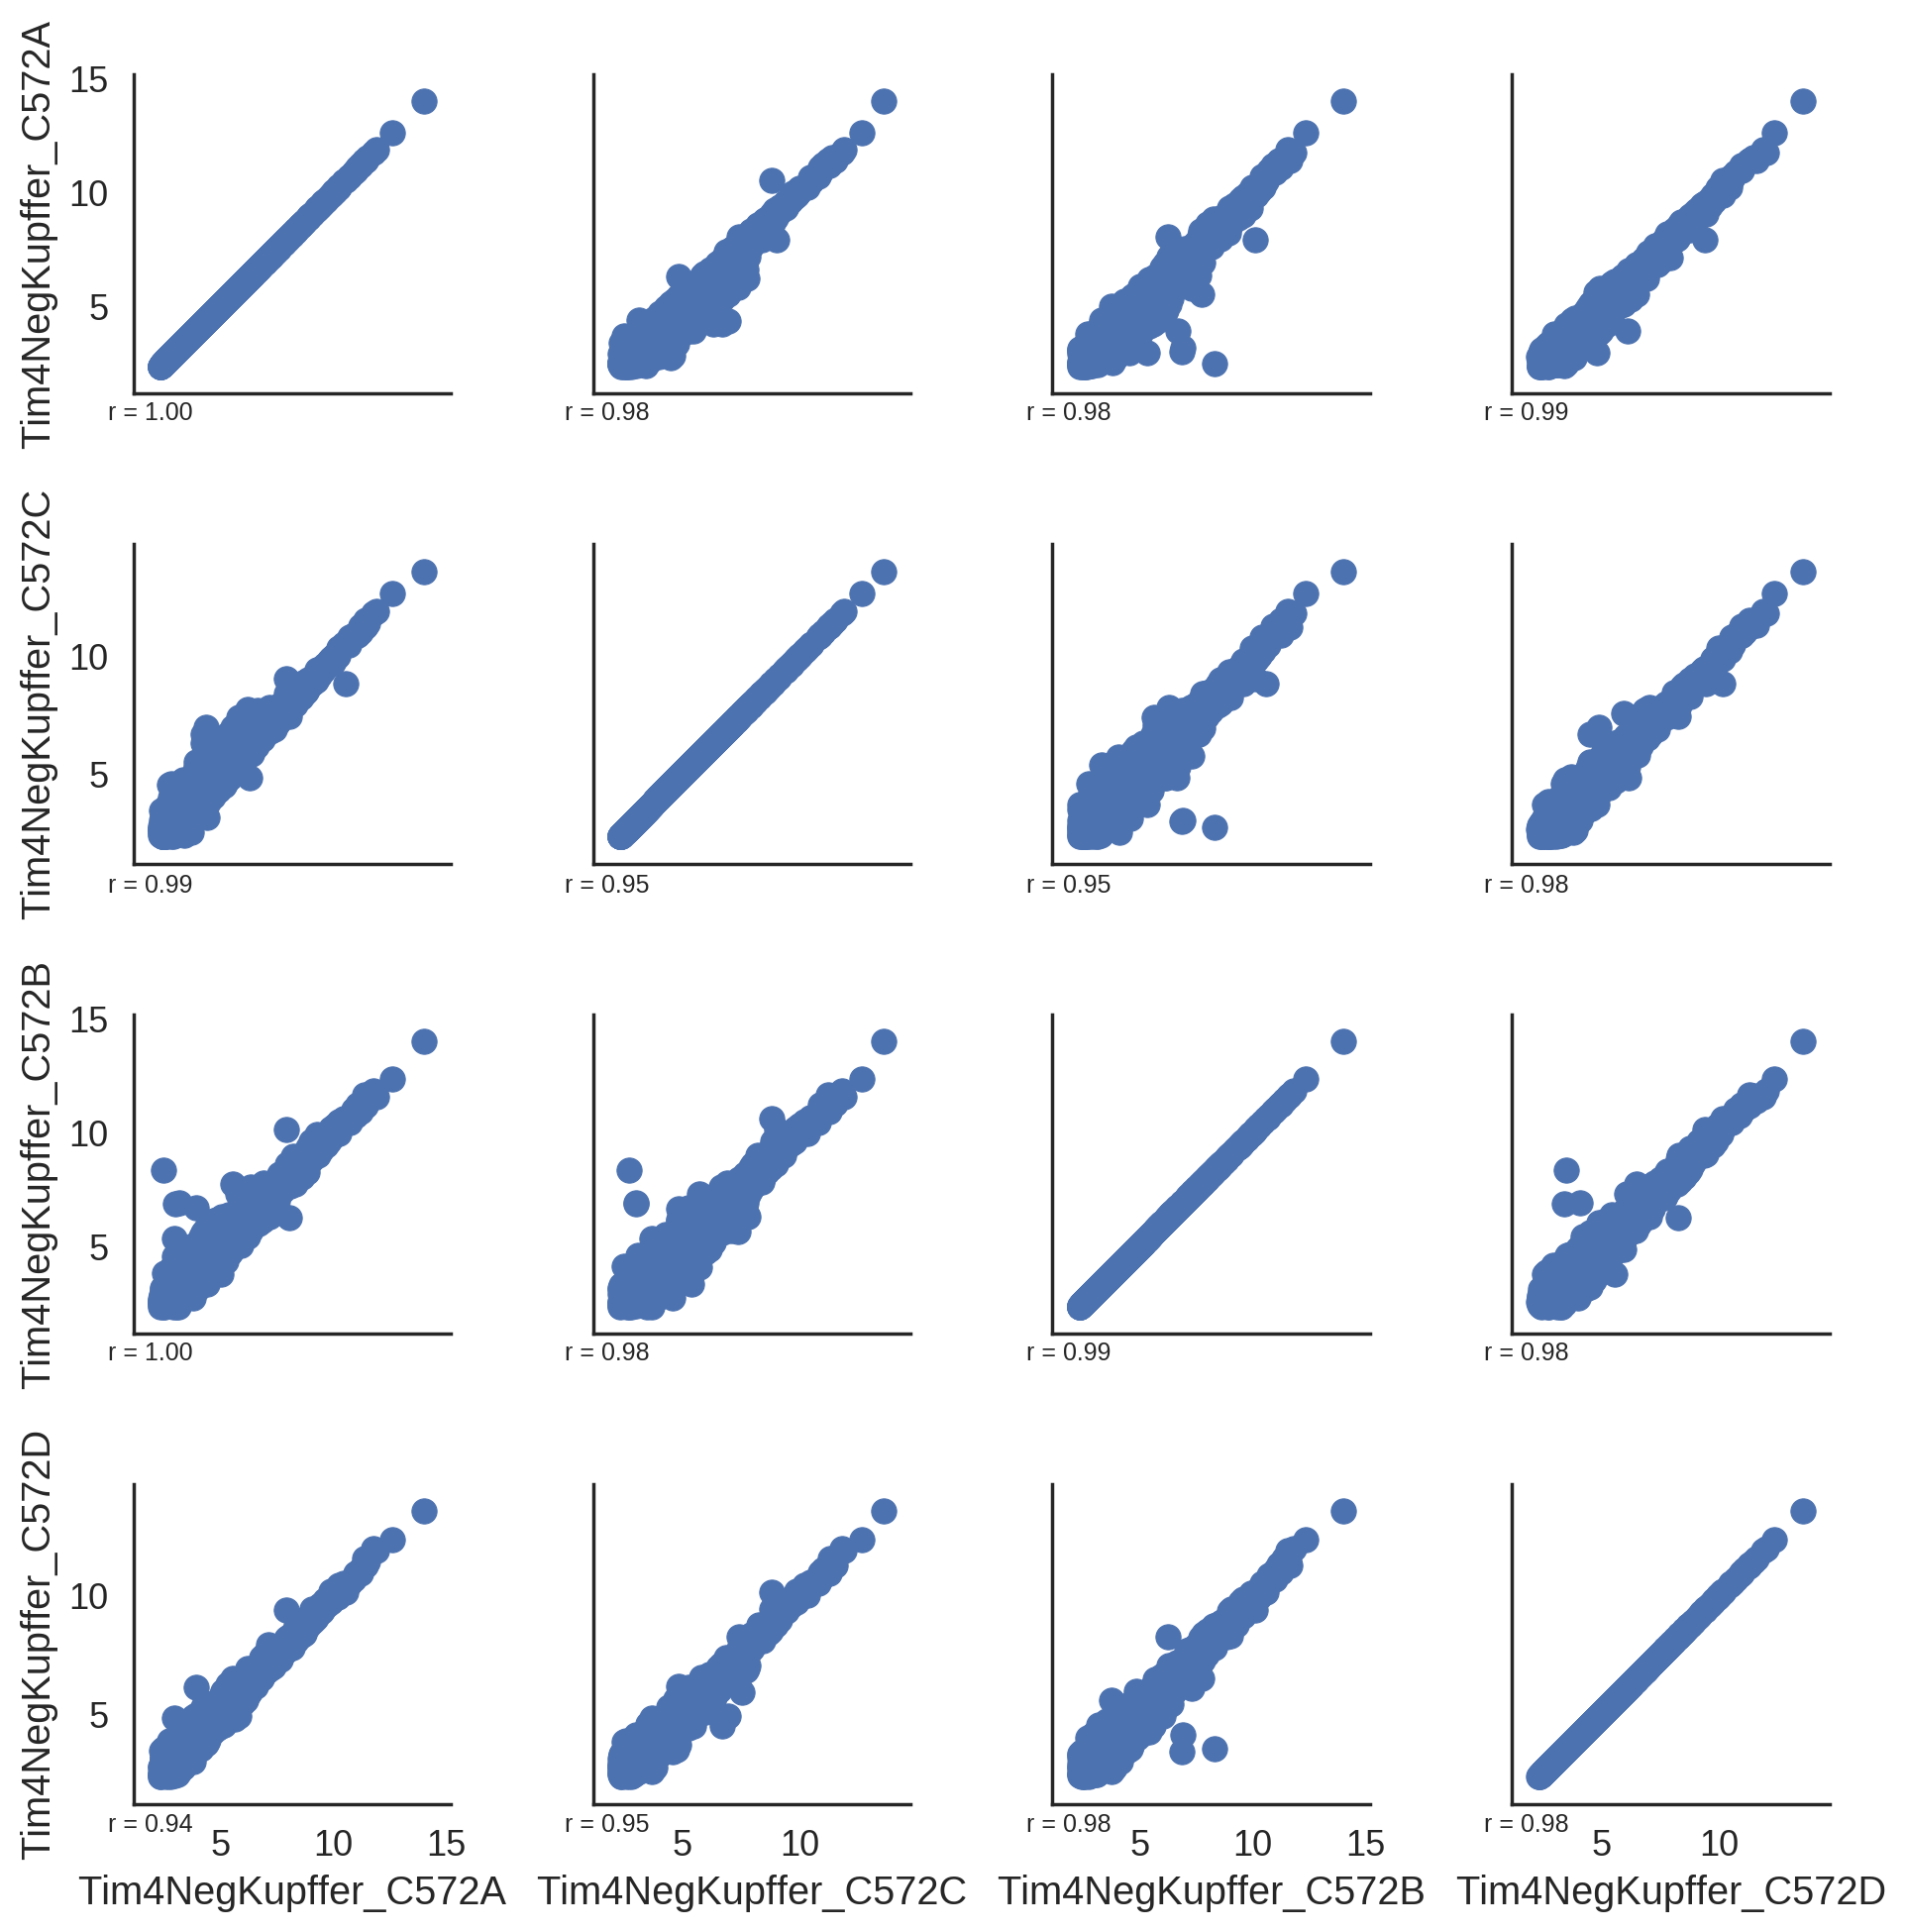

In [79]:
g = sns.PairGrid(np.log2(rpkm_tmp.iloc[:, :4] + 1), size=2.5)
g = g.map(plt.scatter)
corrs = np.log(rpkm_tmp.iloc[:, :7] + 1).corr().values.flatten()
for ax, corrval in zip(g.axes.flat, corrs):
    ax.text(0, 0, "r = %.2f" % corrval, fontsize=9)
plt.savefig('./figures/microglia_rna_corr_scatter.pdf', bbox_inches='tight')

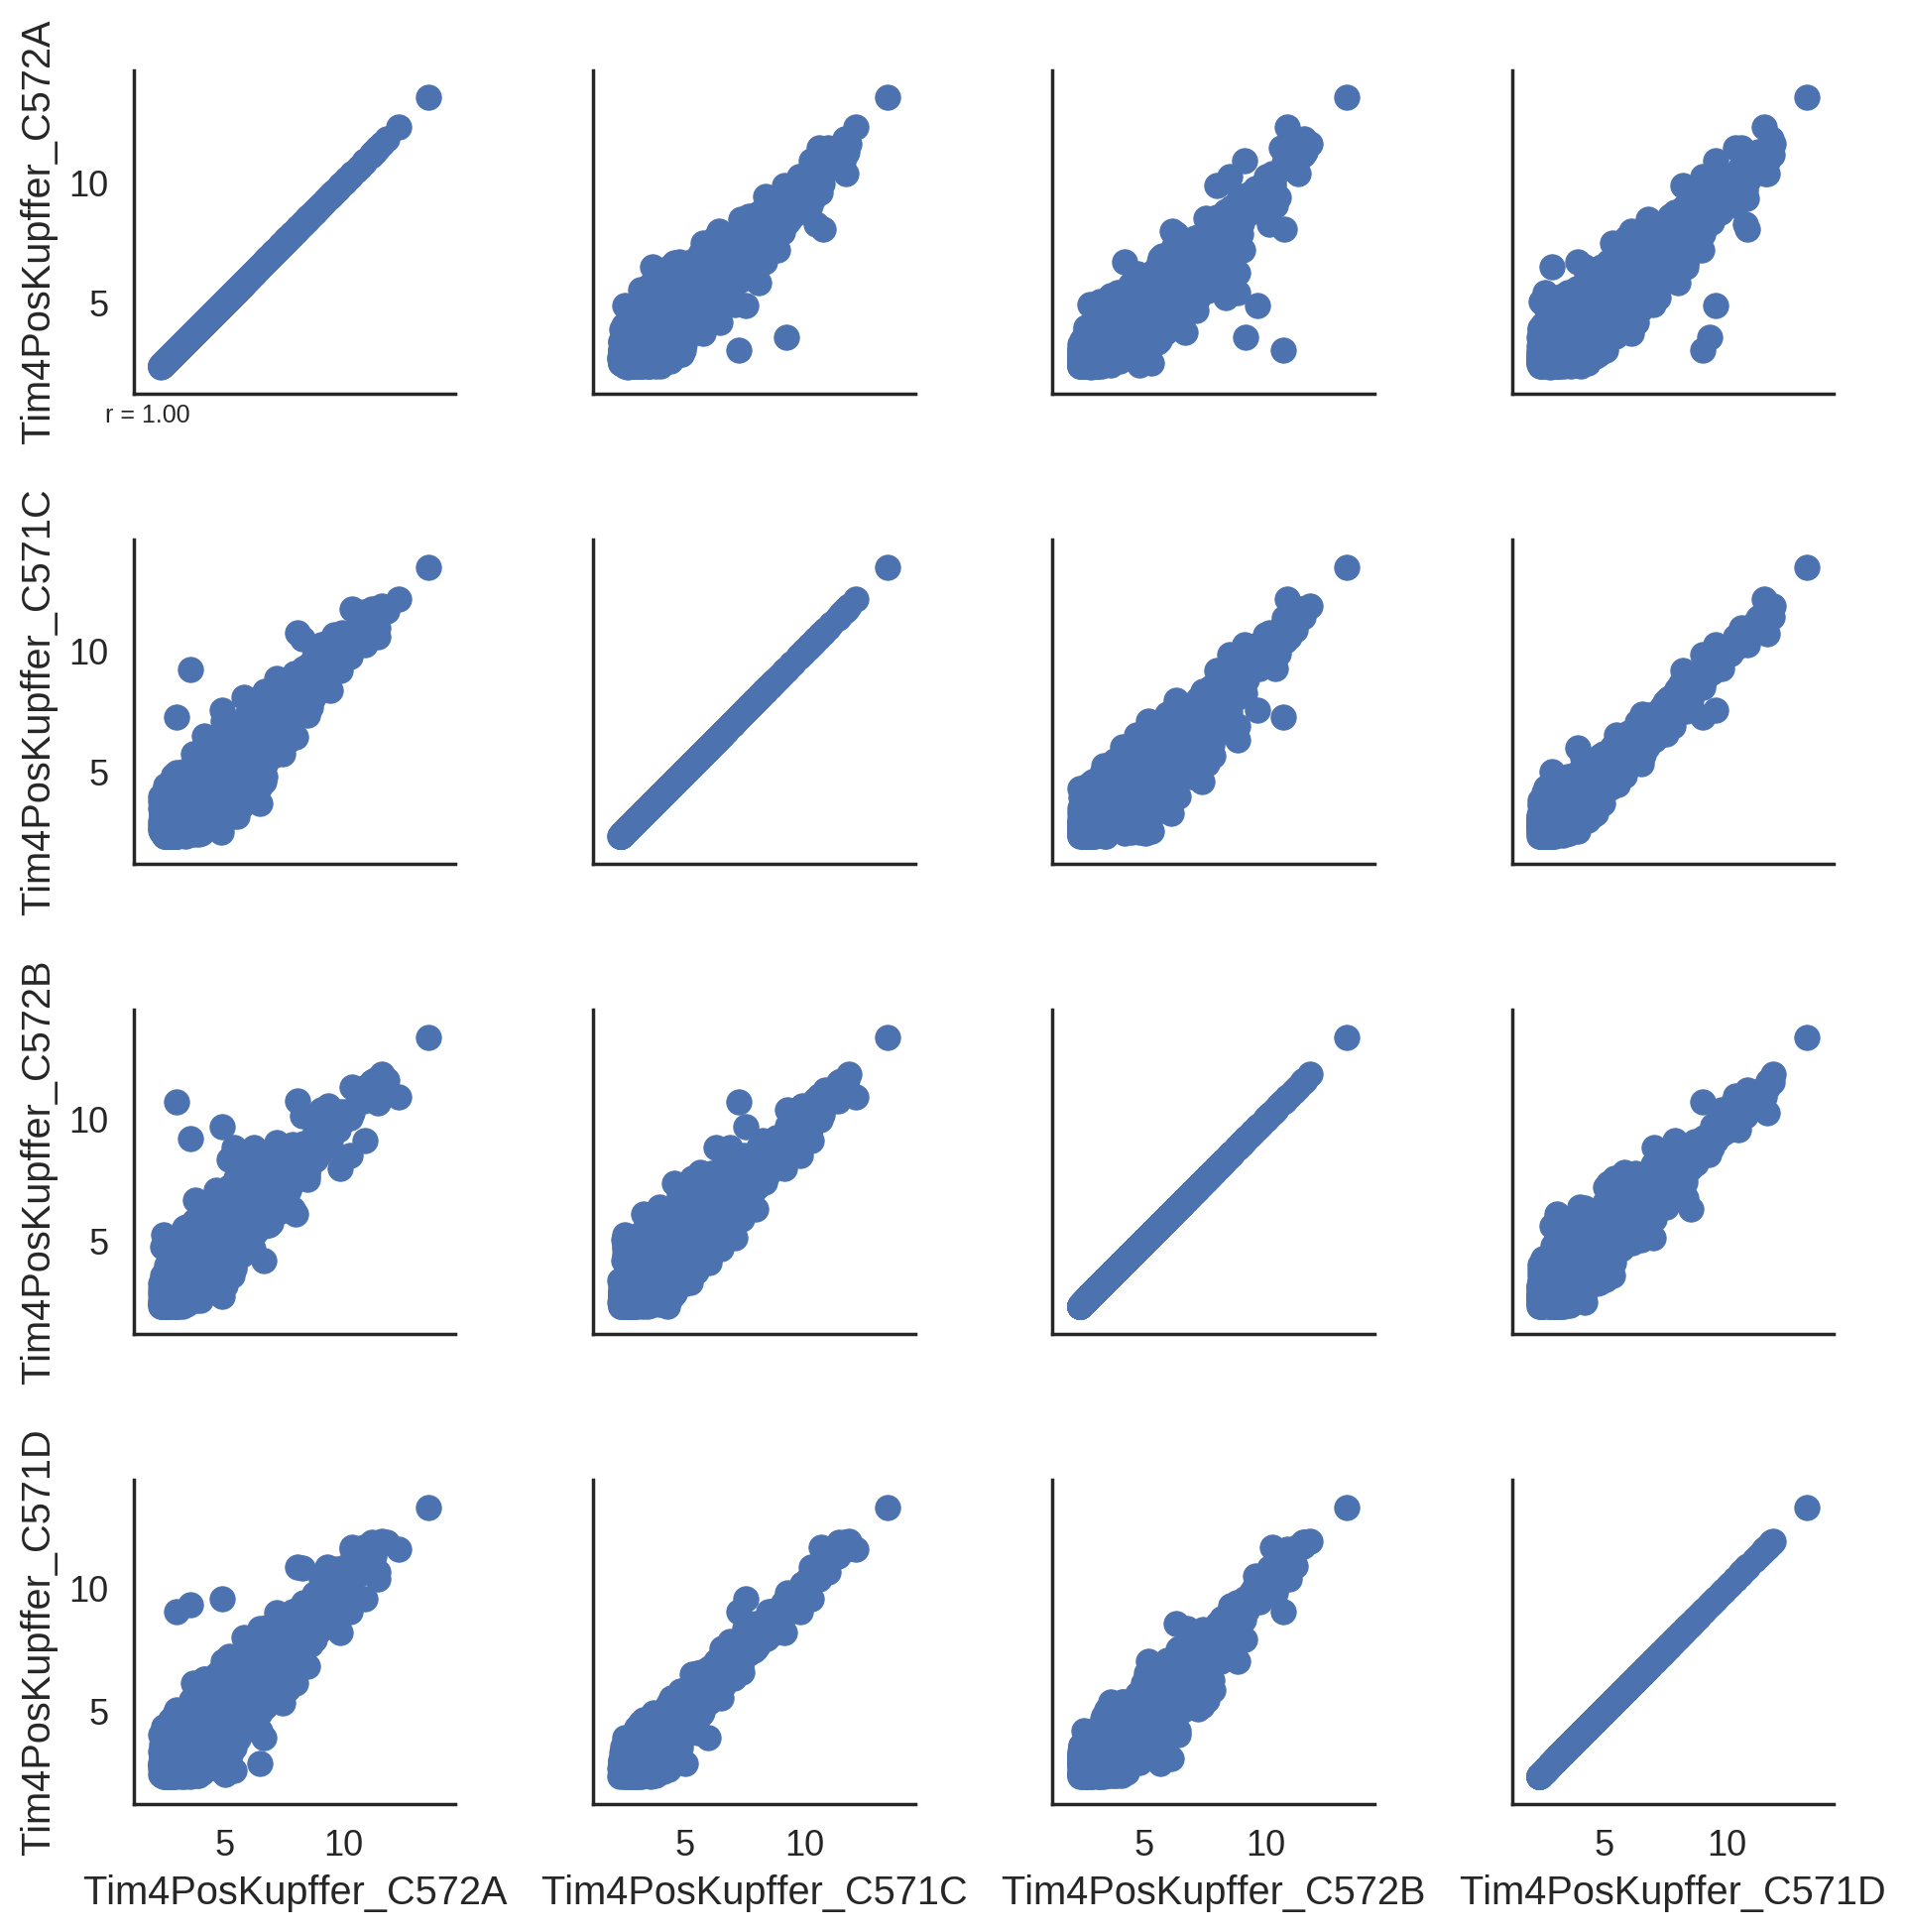

In [80]:
g = sns.PairGrid(np.log2(rpkm_tmp.iloc[:, 4:] + 1), size=2.5)
g = g.map(plt.scatter)
corrs = np.log(rpkm_tmp.iloc[:, 7:] + 1).corr().values.flatten()
for ax, corrval in zip(g.axes.flat, corrs):
    ax.text(0, 0, "r = %.2f" % corrval, fontsize=9)
plt.savefig('./figures/kupffer_rna_corr_scatter.pdf', bbox_inches='tight')

# pearson correlation

/home/h1bennet/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


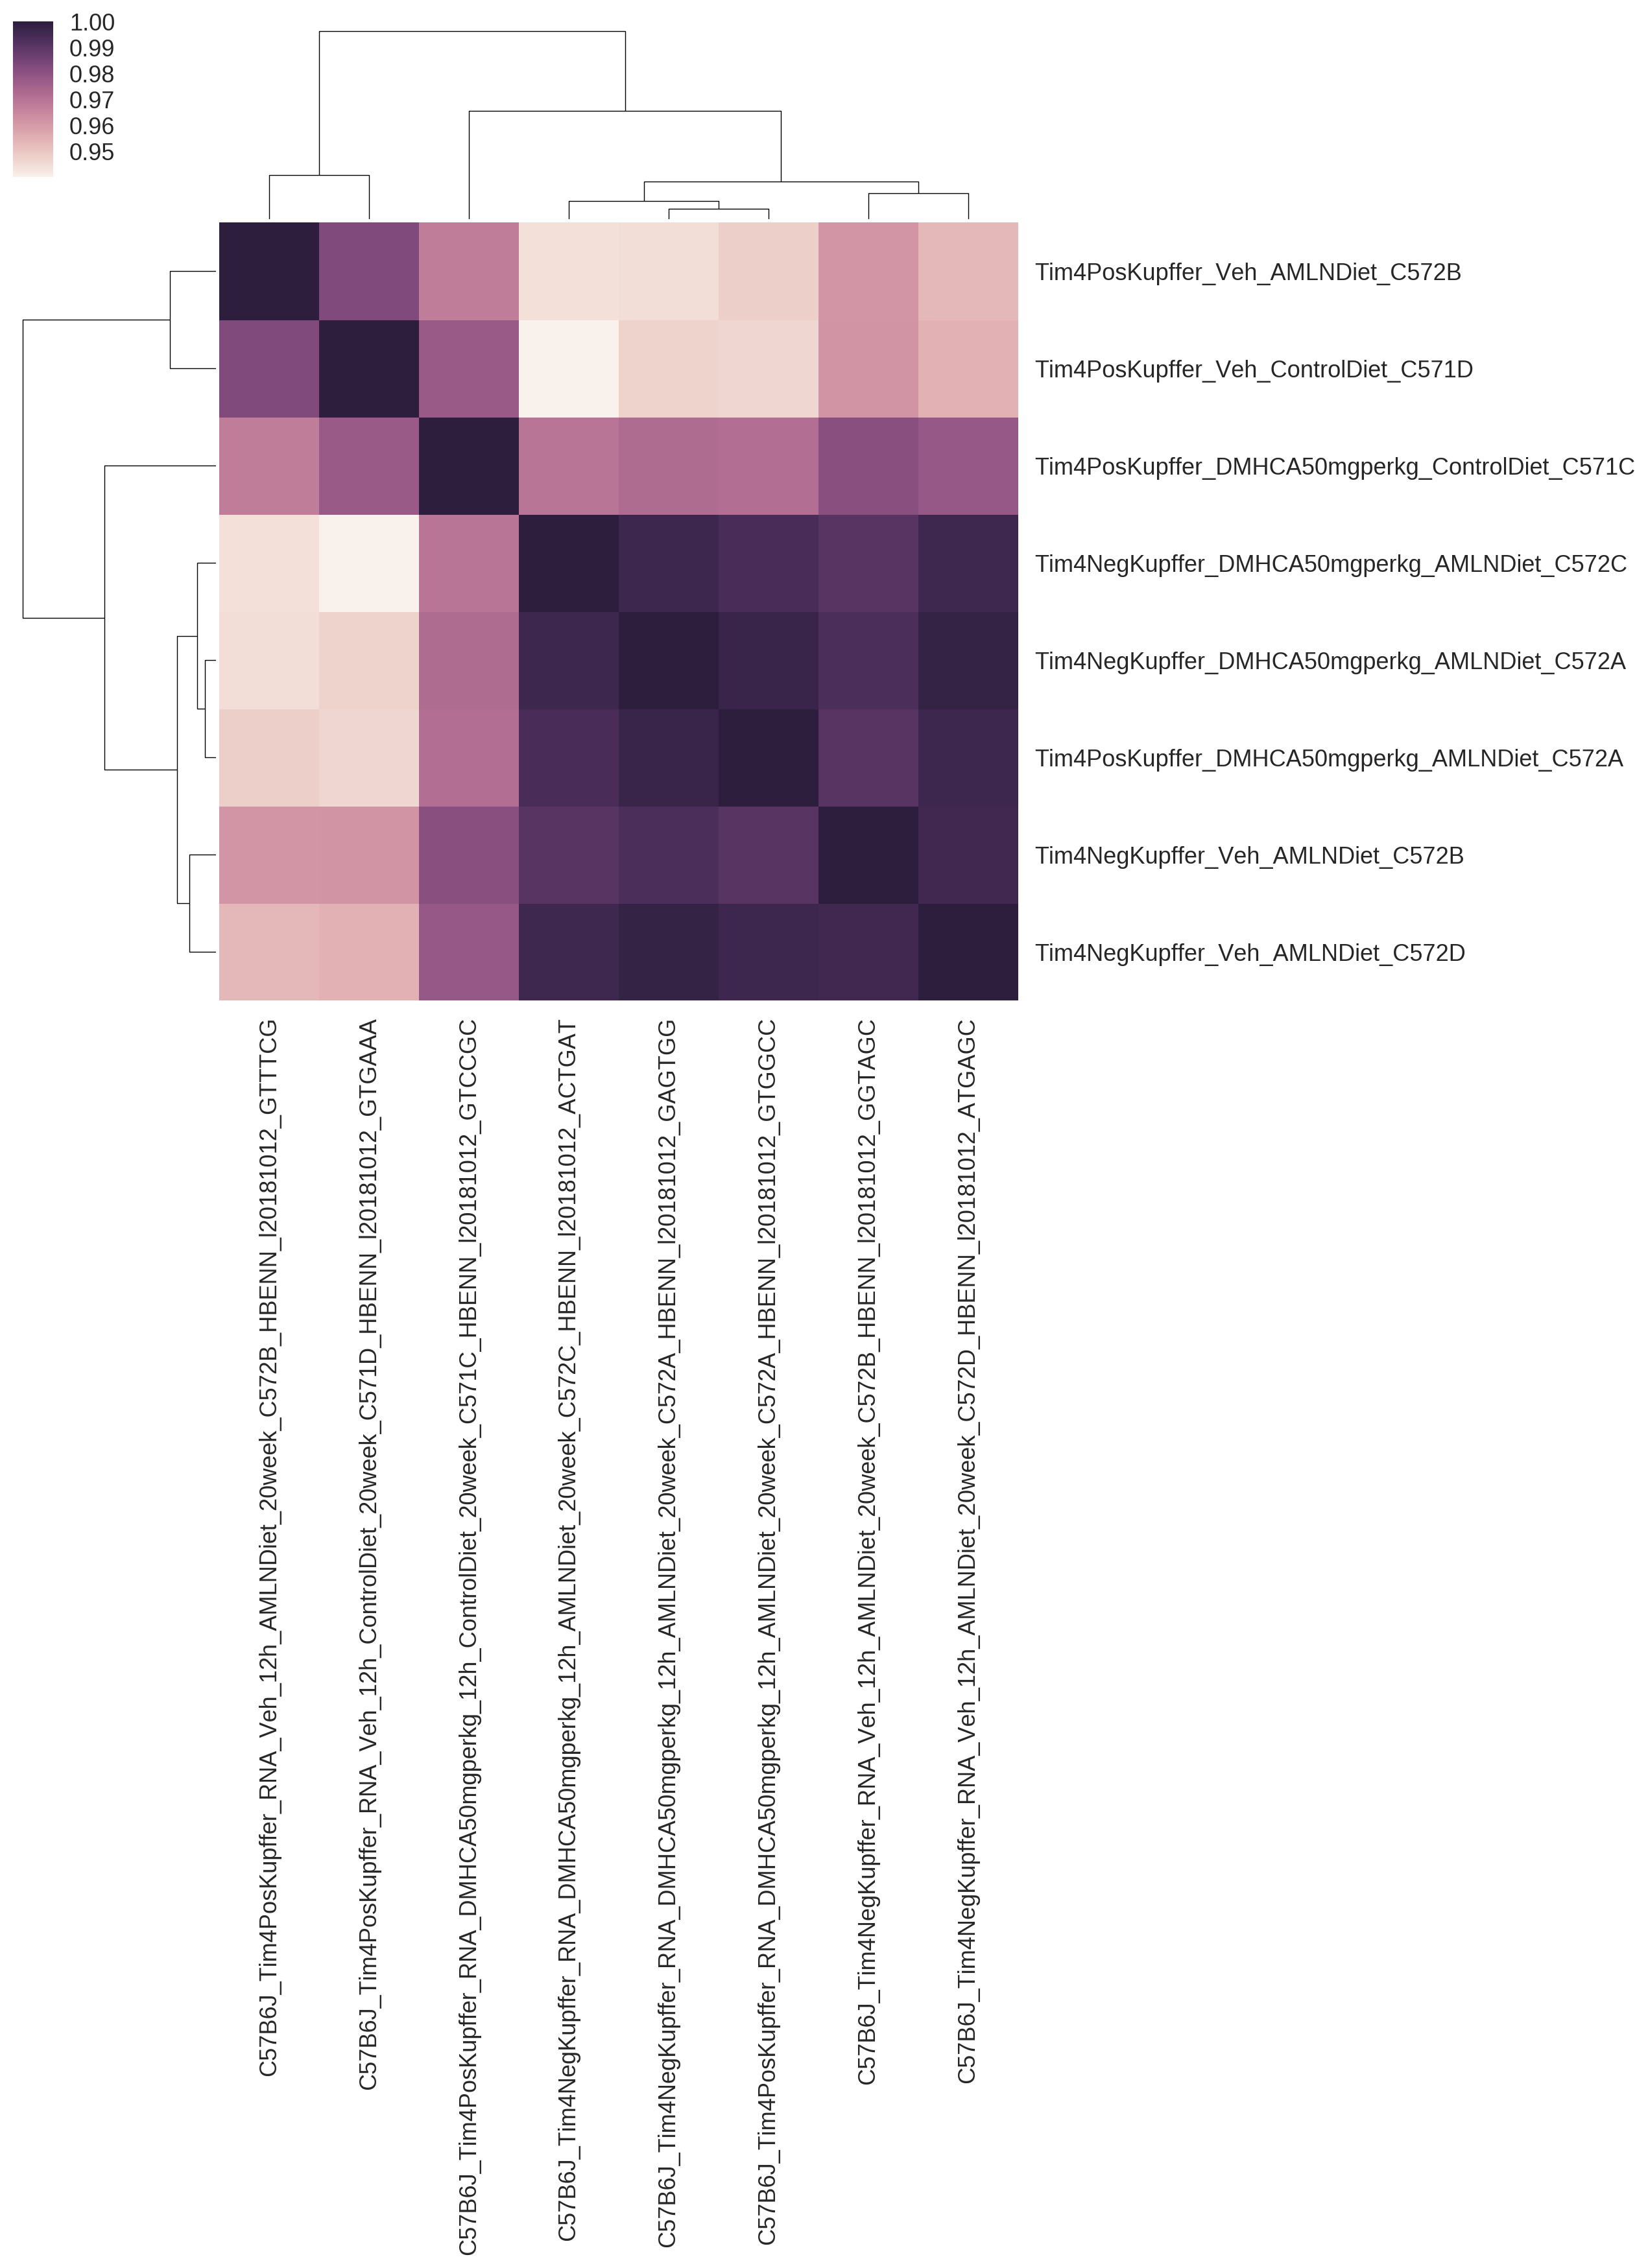

In [81]:
rpkm_corr = rpkm_filt_quant.corr()
rpkm_corr.index = samplesDF.cell+'_'+samplesDF.group+'_'+samplesDF.diet+'_'+samplesDF.cage
cm = sns.clustermap(rpkm_corr)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0);
